In [30]:
#Bir aralığa maksimum noktayı en küçük hata ile alabilecek doğruyu ya da eğriyi bulmak
#Bu dosyada doğrusal olan ve doğrusal olmayan iki SVR da kullanılacak.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [31]:
hit = pd.read_csv('Hitters.csv')
df=hit.copy()
df=df.dropna()
ms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df['Salary']
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [32]:
#sadece hits sütünuyla deneyelim bakalım
#X_train=pd.DataFrame(X_train['Hits'])
#X_test=pd.DataFrame(X_test['Hits'])

In [33]:
from sklearn.svm import SVR #muhattabımız

In [34]:
svr_model = SVR('linear').fit(X_train,y_train)

KeyboardInterrupt: 

In [16]:
svr_pred = svr_model.predict(X_train)

In [17]:
np.sqrt(mean_squared_error(svr_pred,y_train))

389.97589200276997

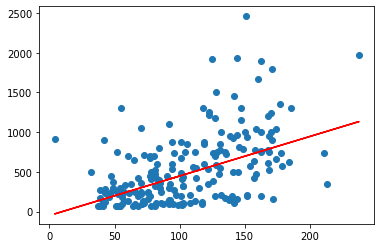

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,svr_pred,color='r')

In [19]:
predicted=svr_model.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test,predicted))

459.0187960365147

In [21]:
#tuning başlıyor

In [35]:

#SÜPER BİR TUNİNG, ÇOK UZUN SÜRÜYOR

svr_params = {'C':np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
svr_cv_model.best_params_#optimal C geldi

{'C': 0.4}

In [39]:
svr_tuned=SVR('linear',C=0.4).fit(X_train,y_train)

In [40]:
tuned_predicted=svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,tuned_predicted))

367.5385297249052

In [37]:
#ilk olarak sadece hits kolonuyla işlem yaptık
#şimdi tüm parametreleri koyduk, felaket uzun sürecek.
#yukarıda dondurdum sadece hits sütununu aldığımız yeri
#ilk işlemin optimal C'si 0.1 di. şimdi tüm parametreler dahil
#optimal C'yi hesaplamaktayım.

In [41]:
#C=0.4 hiperparametresini belirlemek 2 saatten fazla sürdü.
#erken kalk SVR kullanacağın zaman

In [42]:
#C=0.4 hiperparametresi ile mükemmel bir hata sonucu verdi
#kesinlikle nefissss

In [43]:
svr_tuned.coef_

array([[-1.42126455,  6.44761333, -1.82085555,  0.23201531,  0.32070461,
         1.30299613,  8.31022996, -0.06019146,  0.26066881,  2.15743337,
         0.66793113, -0.44998676, -0.19520709,  0.29722296,  0.28674052,
        -0.88271583,  2.83771514, -4.18276971,  0.83367159]])

In [44]:
#Non linear SVR GELİYORRRR

In [45]:
svr_rbf=SVR('rbf').fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
predictedsbr=svr_rbf.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(predictedsbr,y_test))

473.4445984431814

In [50]:
#SBR (NON LİNEAR) TUNİNG GELİYOR

In [51]:
svr_params={'C':[0.1,0.4,5,10,20,30,40,50]}
svr_cv_model=GridSearchCV(svr_rbf,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
pd.Series(svr_cv_model.best_params_)[0]

20

In [54]:
#Final model

In [57]:
svr_tuned=SVR('rbf',C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
predictedsbr=svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(predictedsbr,y_test))

472.20974524750574